# Analysis of the Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp

In [219]:
data_frame = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
# print(data_frame.to_string())
print(data_frame.head())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


By quickly skimming through the above output we notice that there are significantly large order amounts for multiple orders which would influence the AOV. The metric of average order value may not be the right metric to represent this data set. Lets look into it further!

In [160]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [161]:
data_frame["total_items"].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

We have orders with total items ranging from 1-8 and 2000, it is evident orders with 2000 total items would have large order amounts and most likely are influencing the average order value. This is because the AOV is the summation of the order amounts divided by the amount of orders (5000 orders are in the dataset), so large order amounts with relatively small number of order will cause the AOV to definitely represent the dataset poorly. We should look into the order with 2000 total items further, but none the less lets go through all the total item categories. 

Lets start by looking at the max order amounts of orders with 1 total items.

In [162]:
max_order_amount_with_1_total_items = data_frame[data_frame['total_items'] == 1].max()

In [163]:
data_frame[ data_frame["order_amount"] == max_order_amount_with_1_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43


Above are the all the max order amounts of order with 1 total items, and it is significant as the price of one shoe is \\$25725, which generally is not the average person is willing to spend.

<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

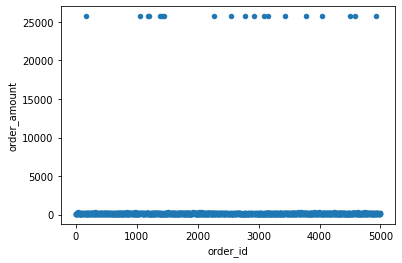

In [164]:
data_frame[data_frame['total_items'] == 1].plot.scatter(x="order_id", y="order_amount")

From the scatter plot above, which looks at all the orders with 1 total items it is clear the 19 orders with \\$25725 order amount are outliers, as majority of the data points lie at the bottom, which would influence the AOV. 

Next lets look at the max order amounts of orders with 2 total items.

In [165]:
max_order_amount_with_2_total_items = data_frame[data_frame['total_items'] == 2].max()

In [166]:
data_frame[ data_frame["order_amount"] == max_order_amount_with_2_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13
2818,2819,78,869,51450,2,debit,2017-03-17 6:25:51
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25


Above are the all the max order amounts of order with 2 total items, and it is significant as the price of two shoes is \\$51450, which generally is not the average person is willing to spend. However, it is important to note the 16 orders are from the same shop with id 78 and 51450 divided by 2 is 25725, so the orders are most likely the same shoe which we saw previously in the max orders with 1 total items. It may seem the shoes might not be outliers afterall but lets take a further look.

<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

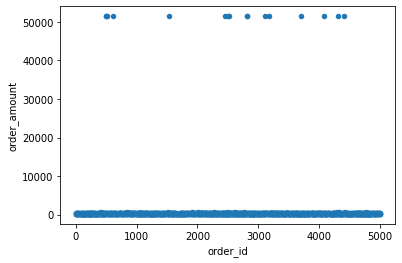

In [167]:
data_frame[data_frame['total_items'] == 2].plot.scatter(x="order_id", y="order_amount")

From the scatter plot above, which looks at all the orders with 2 total items it is clear the 16 orders with \\$51450 order amount are outliers with respect to orders with 2 total items, as majority of the data points lie at the bottom, which would influence the AOV. However, since the 19 orders from the previous max order with 1 total items, the $25725 shoes might not be an outlier, but none the less the AOV is not a metric which represents the data set.

Furthermore, lets look at the max order amounts of orders with 3 total items.

In [168]:
max_order_amount_with_3_total_items = data_frame[data_frame['total_items'] == 3].max()

In [169]:
data_frame[ data_frame["order_amount"] == max_order_amount_with_3_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44


Similar to the orders with 2 total_items, above are the all the max order amounts of order with 3 total items, and it is significant as the price of three shoes is \\$77175, which generally is not the average person is willing to spend. However, it is important to note the 9 orders are from the same shop with id 78 and 77175 divided by 3 is 25725, so the orders are most likely the same shoe which we saw previously in the max orders with 1 total items. It may seem the shoes might not be outliers afterall but lets take a further look.

<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

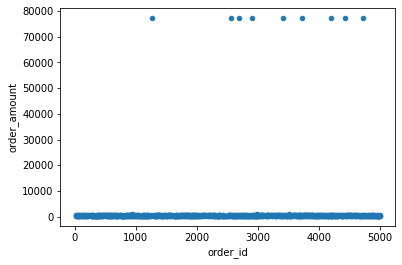

In [170]:
data_frame[data_frame['total_items'] == 3].plot.scatter(x="order_id", y="order_amount")

Again similar to the orders with 2 total items, from the scatter plot above, which looks at all the orders with 3 total items it is clear the 9 orders with \\$77175 order amount are outliers with respect to orders with 3 total items, as majority of the data points lie at the bottom, which would influence the AOV. However, since the 35 orders from the previous max order with 1 and 2 total items, the $25725 shoes might not be an outlier, but none the less the AOV is not a metric which represents the data set.

Moreover, lets look at the max order amounts of orders with 4 total items.

In [171]:
max_order_amount_with_4_total_items = data_frame[data_frame['total_items'] == 4].max()
data_frame[ data_frame["order_amount"] == max_order_amount_with_4_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

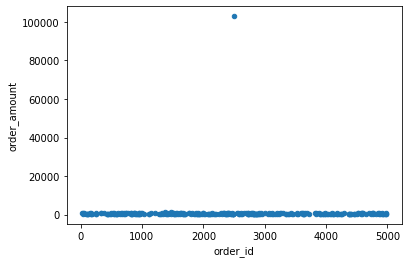

In [172]:
data_frame[data_frame['total_items'] == 4].plot.scatter(x="order_id", y="order_amount")

Above we see the max order of orders with 4 total items. There is one order of 102900, which is an outlier with respect to the rest of the order with 4 total items. This order is from the same shop 78 which sells the \\$25725, so this $102900 order is most likely for 4 of the \\$25725 shoe. It is evident how this one point can influence the AOV.

Moreover, lets look at the max order amounts of orders with 5 total items.

In [173]:
max_order_amount_with_5_total_items = data_frame[data_frame['total_items'] == 5].max()
data_frame[ data_frame["order_amount"] == max_order_amount_with_5_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

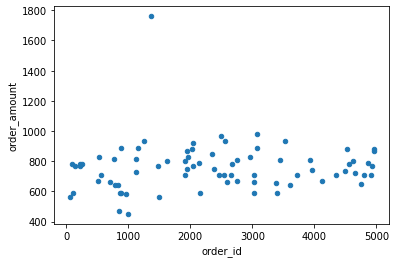

In [174]:
data_frame[data_frame['total_items'] == 5].plot.scatter(x="order_id", y="order_amount")

Here we see the order with id 1365 to be an outlier with respect to the order of 5 total items, which again also influences the AOV.

Lets now look at the max order amounts of orders with 6 total items.

In [175]:
max_order_amount_with_6_total_items = data_frame[data_frame['total_items'] == 6].max()
data_frame[ data_frame["order_amount"] == max_order_amount_with_6_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

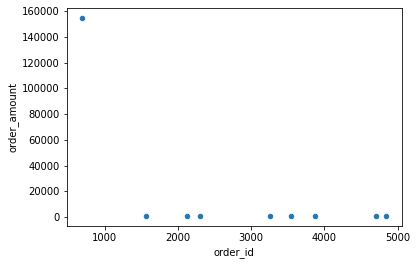

In [176]:
data_frame[data_frame['total_items'] == 6].plot.scatter(x="order_id", y="order_amount")

Above we see that the max order from the category of order of 6 total items, is an outlier with respect to the rest of the orders in the same catergory. This order will influence the AOV as well.

Lets now look at the max order amounts of orders with 8 total items.

In [177]:
max_order_amount_with_8_total_items = data_frame[data_frame['total_items'] == 8].max()
data_frame[ data_frame["order_amount"] == max_order_amount_with_8_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

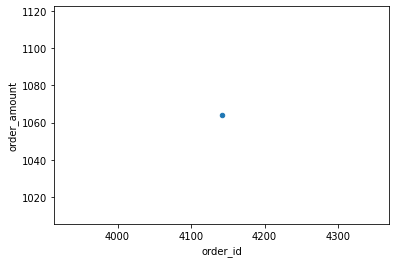

In [178]:
data_frame[data_frame['total_items'] == 8].plot.scatter(x="order_id", y="order_amount")

Here in the category of order with 8 total items, we see that there is only one order of 8 total items, which is not a outlier, however it might still affect the AOV, and we will see talk about that later on. Lets take a look at the last category of 2000 total items.

In [179]:
max_order_amount_with_2000_total_items = data_frame[data_frame['total_items'] == 2000].max()
data_frame[ data_frame["order_amount"] == max_order_amount_with_2000_total_items["order_amount"]]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

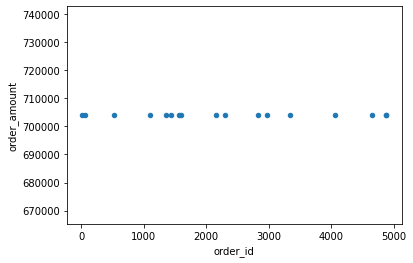

In [180]:
data_frame[data_frame['total_items'] == 2000].plot.scatter(x="order_id", y="order_amount")

Here are the 17 orders of 2000 total items, what we see here is that there is they are not outliers with respect to the orders of 2000 total items. In addition, this category is the most significant and it is placed by the same user who might be a wholesaler buying in bulk and automating it as it is made at the same time. However, the order amount is 704000 which is significant and influences the AOV and we will discuss that further in a bit.

### Check for duplicates

In [189]:
data_frame[data_frame.duplicated(subset=['user_id','created_at'], keep='first')]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00


Here we see the rows which are duplicated in the entire dataset and they are from the category of orders with 2000 total items. This is an indication there is an issue with entering the data into the table, thus creating misentries which is also contributes to the inaccuracy of the AOV.

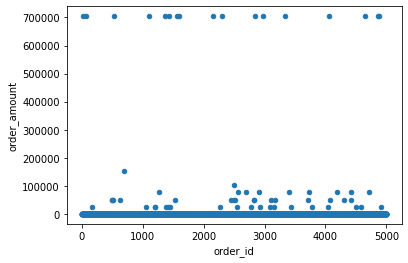

In [181]:
order_id_vs_order_amount = data_frame.plot.scatter(x="order_id", y="order_amount")

Overall, we see the outliers discussed above in the scatter plot above where majority of the orders lie at the bottom in the area of the straight blue line. These outliers do influence our AOV, as their order amounts are significant compared to the standard (or denominator of the number of orders) they are being measured againts. The AOV does not take into consideration the number of shoes being purchased per order and is thus treating each order equally. For example, an order with 1 total items for \\$100 is not equal to an order of 2000 shoes worth $704000. Therefore, the AOV is influenced by order with high order amounts and it does not take into account how many shoes are part of the orders giving us an unwanted average for the values of shoes purchased per order. The AOV is thus skewed and not a good metric to represent the dataset.

##  Solution for a metric to represent the dataset better

Initially, lets remove all duplicates within the dataset.

In [195]:
len(data_frame)

5000

In [210]:
data_frame = data_frame.drop_duplicates(subset=['user_id','created_at'], keep='first')

In [211]:
len(data_frame)

4995

Lets calculate the average shoe value/price instead of the AOV, by getting the sum from the order_amount column and dividing it by the sum from the total_items column.

In [217]:
total_items = data_frame["total_items"].sum()

In [213]:
print(total_items)

33936


In [214]:
total = data_frame["order_amount"].sum()

In [215]:
average_shoe_value = total/total_items

In [216]:
print(average_shoe_value)

359.6664309288072


# Question 1

#####  a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The outliers discussed above in the scatter plot above where majority of the orders lie at the bottom in the area of the straight blue line. These outliers do influence our AOV, as their order amounts are significant compared to the standard (or denominator of the number of orders) they are being measured againsts. The AOV does not take into consideration the number of shoes being purchased per order and is thus treating each order equally. For example, an order with 1 total items for \\$100 is not equal to an order of 2000 shoes worth $704000. Therefore, the AOV is influenced by order with high order amounts and it does not take into account how many shoes are part of the orders giving us an unwanted average for the values of shoes purchased per order. Along with the duplicated rows, which were of a significant order_amount of \\$704000 would give us an inaccurate and skewed AOV. The AOV is thus skewed and not a good metric to represent the dataset. A better way to evaluate this data would be to find the average price of each shoe by finding the sum from the order_amount column and dividing it by the sum from the total_items column, which takes into consideration the amount of shoes sold in each order. However, before that we should remove any significant outliers and remove any duplicates as well from the dataset.

##### b. What metric would you report for this dataset?

I would use the average shoe value (ASV). Using the AOV our result would be skewed by the large order_amount values where the total_items of each order is not taken into account. Using the ASV we find the average price of each shoe, by getting the sum from the order_amount column and dividing it by the sum from the total_items column.

##### c. What is its value?

In [220]:
data_frame = data_frame.drop_duplicates(subset=['user_id','created_at'], keep='first')
total_items = data_frame["total_items"].sum()
total_order_amount = data_frame["order_amount"].sum()
average_shoe_value = total/total_items
print(average_shoe_value)

359.6664309288072


The Average Shoe Value is: $359.67

# Question 2

##### a. How many orders were shipped by Speedy Express in total?

Query: SELECT COUNT(*) FROM Orders INNER JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID WHERE Shippers.ShipperName == 'Speedy Express';


Answer: 54

##### b. What is the last name of the employee with the most orders?

Query: SELECT Employees.LastName FROM Orders INNER JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID GROUP BY (Orders.EmployeeID) ORDER BY COUNT(Orders.EmployeeID) DESC LIMIT 1;

Answer: Peacock

##### c. What product was ordered the most by customers in Germany?

Query: SELECT Products.ProductName FROM (((Orders INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID) INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID) INNER JOIN Products ON OrderDetails.ProductID=Products.ProductID)Where Customers.Country == 'Germany' GROUP BY OrderDetails.ProductID ORDER BY Count(Orders.OrderID) DESC LIMIT 1;

Answer: Gorgonzola Telino